In [5]:
using NetworkEpidemics
using LightGraphs
using Statistics
using Plots
using ColorSchemes
using Random

In [7]:
Random.seed!(2021);

In [8]:
N = 1000
M = 20

10

In [ ]:
ps = fill(0.5, M)
ps[1] = 0.9

In [40]:
h = erdos_renyi(M, 0.6)
gs = [erdos_renyi(N, p) for p in ps]

{1000, 25000} undirected simple Int64 graph

In [12]:
β = 0.1 # transmission rate
γ = 0.1
D = 0.1 # diffusion rate

0.1

In [42]:
mp = Metapopulation(h, D, SIS(β,γ))

mpx = HeterogeneousMetaplex(gs, h, D, SIS(β,γ))

Metaplex{SI}({1000, 25000} undirected simple Int64 graph, {10, 45} undirected simple Int64 graph, [0.1, 0.1], SI(0.1))

In [14]:
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = [div(i-1,div(N,M))+1 for i in 1:N]

1000-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [15]:
x0_mp = Array{Int,2}(undef, M, 2)
x0_mp[2:M,:] .= [100 0]
x0_mp[1, :] .= [90, 10]

2-element view(::Array{Int64,2}, 1, :) with eltype Int64:
 90
 10

In [16]:
# infected seed randomly dispersed over meta-nodes
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = rand(1:M, N)
x0_mp = zeros(Int, M, 2)
for i in 1:N
    x0_mp[x0_μ[i], x0_i[i]] += 1
end

In [36]:
tmax = 30.0
nmax = 100000
nsims = 500
nbins = 200

200

In [43]:
ts_av_mpx, u_av_mpx = average(mpx, [x0_i,x0_μ], tmax=tmax, nmax=nmax, nbins=nbins, nsims=nsims, progressbar=false);

In [44]:
ts_mf, u_mf = meanfield(mp, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_1, u_mf_1 = meanfield(mp_1, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_2, u_mf_2 = meanfield(mp_2, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_3, u_mf_3 = meanfield(mp_3, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_4, u_mf_4 = meanfield(mp_4, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_mpx, u_mf_mpx = meanfield(mpx, [x0_i,x0_μ], tmax=tmax, saveat=ts_av_mpx)

([0.0, 0.15075376884422112, 0.30150753768844224, 0.4522613065326633, 0.6030150753768845, 0.7537688442211056, 0.9045226130653266, 1.0552763819095476, 1.206030150753769, 1.35678391959799  …  28.64321608040201, 28.79396984924623, 28.94472361809045, 29.09547738693467, 29.246231155778894, 29.396984924623116, 29.547738693467338, 29.698492462311556, 29.849246231155778, 30.0], [[87.0 93.0 … 103.0 98.0; 87.10734369881023 93.0985906079455 … 102.8248880339795 97.93894054726722; … ; 0.005264899135199291 0.005476898978609917 … 0.004902736754849705 0.005048995003155241; 0.0048827779982493925 0.005075502861157376 … 0.004550262832251134 0.004684223887313248], [1.0 0.0 … 2.0 1.0; 1.0919872274666824 0.01768576571602356 … 2.092057413405126 1.0776703632558446; … ; 99.55941606481635 99.74058699665981 … 100.17648019493198 99.95867441865947; 99.56702923150746 99.74520650268383 … 100.17381973320703 99.95964177690483]])

In [20]:
colors = ColorSchemes.tab10;

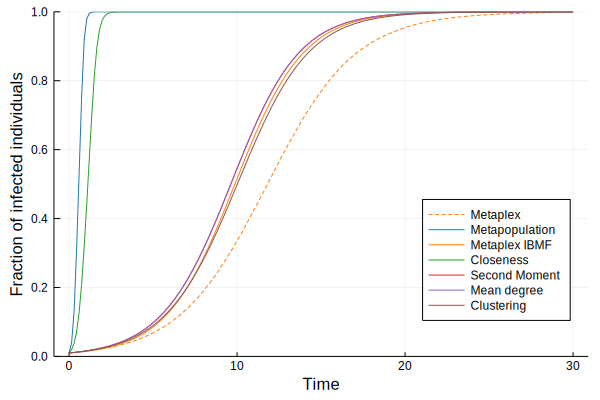

In [45]:
plot(ts_av_mpx, sum(u_av_mpx[2], dims=2)/N,
    label="Metaplex",
    xlabel="Time",
    ylabel="Fraction of infected individuals",
    linestyle=:dash,
    legend=:bottomright,
    color = colors[2],
    ylims = (0.0,1.0)
    )
    plot!(ts_mf, sum(u_mf[2], dims=2)/N,
    #label="Meanfield (No correction)",
    label = "Metapopulation",
#    xlabel="Time",
#    ylabel="Fraction of infected individuals",
    #legend=:bottomright,
    color = colors[1]
    )
    plot!(ts_mf_mpx, sum(u_mf_mpx[2], dims=2)/N,
#    label="Meanfield (Metaplex)",
    label = "Metaplex IBMF",
    color = colors[2]
    )